# 1. EDA

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_dir= '../dataset/train/train.csv'
test_dir= '../dataset/test/test_data.csv'
train_dataset = pd.read_csv(train_dir)
test_dataset = pd.read_csv(test_dir)

In [5]:
train_dataset

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


## 1.1 데이터 빈도 분석

C:\Users\N\miniconda3\envs\home\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label', ylabel='Density'>

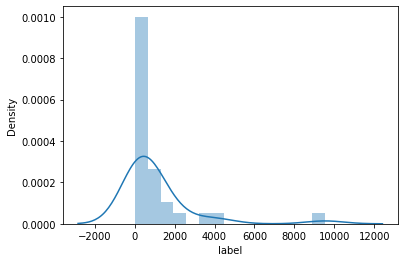

In [6]:
train_dataset_count = train_dataset['label'].value_counts()
sns.distplot(train_dataset_count)

Text(0.5, 1.0, 'test_dataset: label')

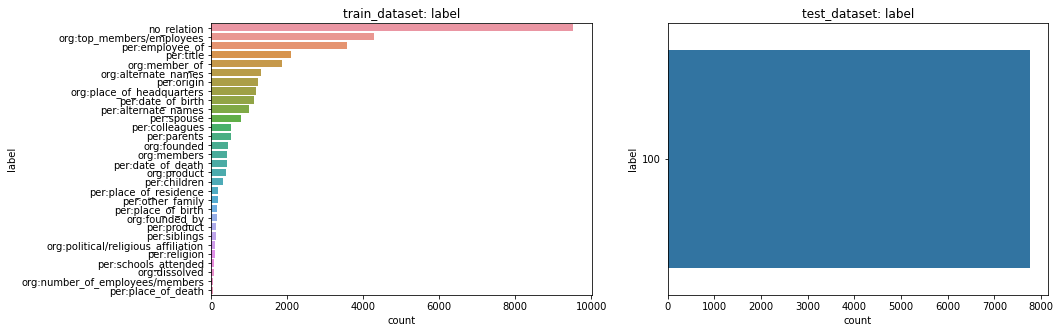

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(y=train_dataset['label'], ax=ax[0], order = train_dataset['label'].value_counts().index).set_title("train_dataset: label")
sns.countplot(y=test_dataset['label'], ax=ax[1]).set_title("test_dataset: label")

Text(0.5, 1.0, 'test_dataset: source')

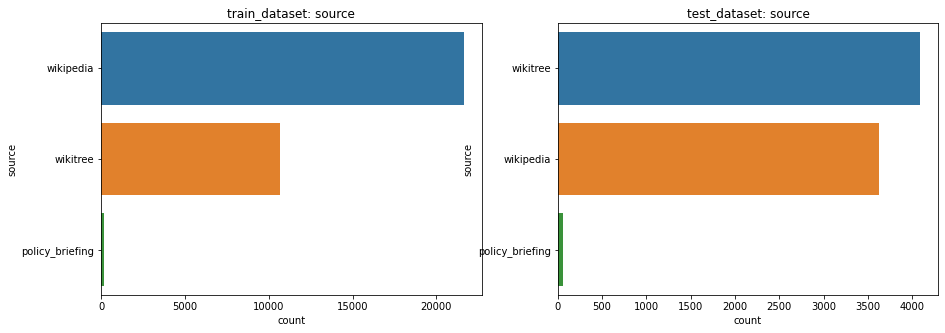

In [6]:
fig,ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(y=train_dataset['source'], ax=ax[0]).set_title("train_dataset: source")
sns.countplot(y=test_dataset['source'], ax=ax[1]).set_title("test_dataset: source")

In [7]:
subject_entity_dict = train_dataset['subject_entity']
subject_entity_dict[0]

"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}"

In [8]:
subject_entity_type = [eval(e)['type'] for e in train_dataset['subject_entity']]
object_entity_type= [eval(e)['type'] for e in train_dataset['object_entity']]
t_subject_entity_type = [eval(e)['type'] for e in test_dataset['subject_entity']]
t_object_entity_type= [eval(e)['type'] for e in test_dataset['object_entity']]

Text(0.5, 1.0, 'train : object_entity')

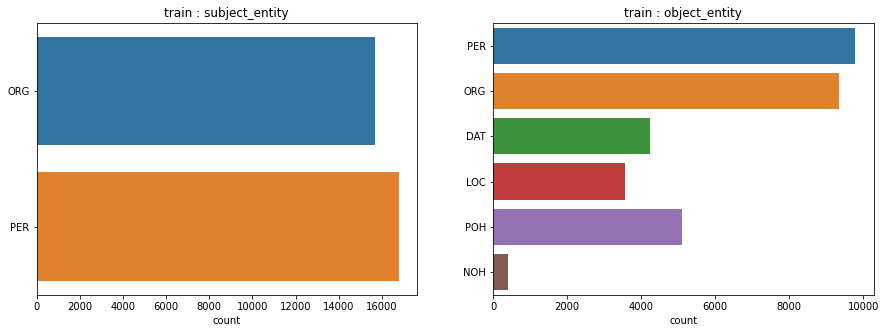

In [9]:
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(y=subject_entity_type, ax=ax[0]).set_title("train : subject_entity")
sns.countplot(y=object_entity_type, ax=ax[1]).set_title("train : object_entity")

Text(0.5, 1.0, 'test : object_entity')

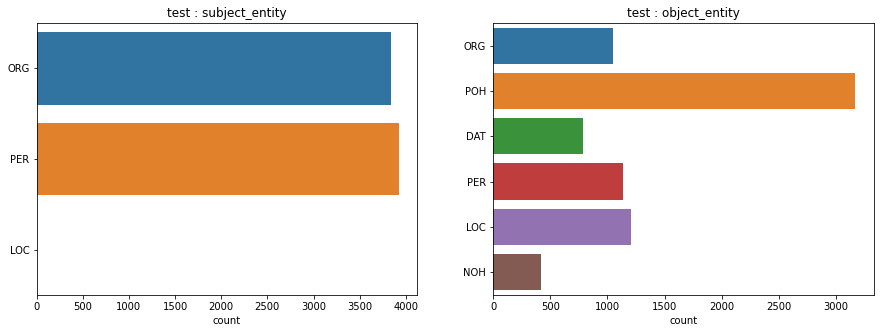

In [10]:
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(y=t_subject_entity_type, ax=ax[0]).set_title("test : subject_entity")
sns.countplot(y=t_object_entity_type, ax=ax[1]).set_title("test : object_entity")

In [11]:
train_sentence_length = [len(e) for e in train_dataset['sentence']]
test_sentence_length = [len(e) for e in test_dataset['sentence']]

Text(0.5, 1.0, 'test : sentence_length')

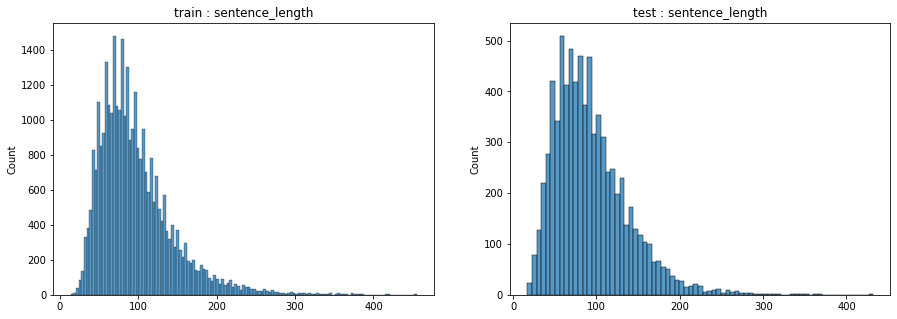

In [12]:
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train_sentence_length, ax=ax[0]).set_title("train : sentence_length")
sns.histplot(test_sentence_length, ax=ax[1]).set_title("test : sentence_length")

## 1.2 중복데이터 확인

In [58]:
# 데이터 모든 열이 중복인 데이터 갯수
#pd.options.display.max_rows = 100
duplicated_input = train_dataset[train_dataset.duplicated(['sentence', 'subject_entity','object_entity']) == True]
duplicated_all = train_dataset[train_dataset.duplicated(['sentence', 'subject_entity','object_entity', 'label']) == True]
print(len(duplicated_input))
print(len(duplicated_all))
duplicated_all

47
42


,id,sentence,subject_entity,object_entity,label,source
3547,3547,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,"{'word': '전라북도청', 'start_idx': 14, 'end_idx': ...","{'word': '행정안전부', 'start_idx': 29, 'end_idx': ...",no_relation,wikipedia
7168,7168,"특히, KRI 한국기록원으로부터 2년 연속 공인중개사 최다 합격자 배출 기록을 공식...","{'word': '한국기록원', 'start_idx': 8, 'end_idx': 1...","{'word': 'KRI', 'start_idx': 4, 'end_idx': 6, ...",org:alternate_names,wikitree
8693,8693,김영삼 전 대통령은 2012년 7월 11일 김문수 새누리당 대선 경선후보의 예방에 ...,"{'word': '김문수', 'start_idx': 24, 'end_idx': 26...","{'word': '박근혜', 'start_idx': 47, 'end_idx': 49...",no_relation,wikipedia
10043,10043,특히 신분변화를 담고 있는데 1차 시도는 김영삼 정부 시절 해양수산부 장관이 각 지...,"{'word': '해운항만청', 'start_idx': 47, 'end_idx': ...","{'word': '해양수산부', 'start_idx': 33, 'end_idx': ...",org:member_of,wikipedia
10202,10202,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
10616,10616,"전현무 소속사 SM C&C는 ""'아나운서'라는 직업적 공통분모 속에서 선후배 간 좋...","{'word': '전현무', 'start_idx': 0, 'end_idx': 2, ...","{'word': 'SM C&C', 'start_idx': 8, 'end_idx': ...",per:employee_of,wikitree
14094,14094,"석가제환인다라(釋迦提桓因陀羅)에서 석가는 샤크라(Śakra)의 음역어인데, 샤크라는...","{'word': '인드라', 'start_idx': 54, 'end_idx': 56...","{'word': 'Indra', 'start_idx': 58, 'end_idx': ...",per:alternate_names,wikipedia
14658,14658,함연지는 함영준 오뚜기 회장의 장녀다.,"{'word': '오뚜기', 'start_idx': 9, 'end_idx': 11,...","{'word': '함영준', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree
15776,15776,그러나 곧 이은 총선에서 한나라당이 원내 1당을 차지했고 연정상대였던 자유민주연합은...,"{'word': '자유민주연합', 'start_idx': 39, 'end_idx':...","{'word': '한나라당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikipedia
18171,18171,"지난 5월, CY그룹(전국 최대규모 롯데백화점․롯데마트 등 롯데그룹 유통매장 보유)...","{'word': '롯데백화점', 'start_idx': 20, 'end_idx': ...","{'word': '롯데그룹', 'start_idx': 33, 'end_idx': 3...",org:member_of,wikitree


In [35]:
# 데이터는 같지만 label이 다른 경우의수
duplicated_input[~duplicated_input['id'].isin(duplicated_all['id'])]

,id,sentence,subject_entity,object_entity,label,source
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
12829,12829,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",org:top_members/employees,wikipedia
22258,22258,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",no_relation,wikitree
25094,25094,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:place_of_headquarters,wikitree
32299,32299,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",per:alternate_names,wikitree


## 1.3. 엔티티 단어별 빈도수


In [45]:
subj_word = [eval(e)['word'] for e in train_dataset['subject_entity']]

In [57]:
# 자주 출현하는 단어로 Vocab에 추가해보는것을 어떨지
pd_subj_word = pd.Series(subj_word).value_counts()
pd_subj_word[0:100]

민주당           144
화순군           107
고흥군            99
광주광역시          92
더불어민주당         92
여수시            82
목포시            80
문재인            80
영암군            75
포천시            73
FC 서울          71
기획재정부          70
영광군            69
노무현            68
두산 베어스         68
해남군            66
곡성군            62
공무원연금공단        61
경남대학교          58
박정희            53
러시아            52
김대중            52
김영삼            51
민주평화당          50
담양군            49
한국동서발전         49
엔씨소프트          48
나주시            48
삼성 라이온즈        48
삼성전자           48
신익희            47
대한항공           46
보건복지부          45
요미우리 자이언츠      45
베트남            45
나경원            45
광주여대           44
뉴욕 양키스         44
유럽 축구 연맹       44
자유민주연합         43
통일민주당          43
완도군            43
자유당            42
안철수            42
아이유            42
하이트진로          42
대안신당           41
정의당            41
문화방송           41
질병관리본부         41
11번가           40
신안군            39
프리미어리그         39
국민의당           38
양평군            38
SK 와이번스   